# Import

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns



# Data Export

In [2]:
df = pd.read_excel('/Users/margotiamanova/Desktop/DI-FinalProject/results/Yad2_Real_Estate_Listings.xlsx')

In [3]:
df.head() ## Displays the first 5 rows by default
df.info() ## Displays the data types of each column and the number of non-null values
df.describe() ## Displays the summary statistics of the numerical columns
df.columns ## Displays the names of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   ID_numeric                                 2393 non-null   int64 
 1   Address                                    2393 non-null   object
 2   Price                                      2393 non-null   int64 
 3   Currency                                   2393 non-null   object
 4   Link                                       2393 non-null   object
 5   Property Type                              2393 non-null   object
 6   Rooms_count                                2393 non-null   int64 
 7   Floor                                      2393 non-null   int64 
 8   Area                                       2393 non-null   int64 
 9   City                                       2224 non-null   object
 10  Neighborhood                        

Index(['ID_numeric', 'Address', 'Price', 'Currency', 'Link', 'Property Type',
       'Rooms_count', 'Floor', 'Area', 'City', 'Neighborhood', 'Tags1',
       'Tags2', 'Tags3', '3 bathrooms', 'Security room', '2 balconies',
       'Unique', 'After urban renewal', 'Renovated building', '3 balconies',
       'Large kitchen', 'Parking', '3 air directions', '4 bathrooms',
       'Close to park', 'Close to the sea', 'Open city view',
       '4 air directions', 'Open sea view', '4 balconies', 'Flexible price',
       'New property', 'Master suite', 'First line to the sea',
       'Open park view', 'Received urban renewal permit',
       'Worth seeing / Don’t miss out', 'Rear-facing property',
       'New from the contractor', 'Architecturally renovated',
       'Bargain opportunity / Special opportunity', 'recommended'],
      dtype='object')

# Data Cleaning


    Removing Duplicates
    Removing Irrelevant Data
    Fixing Structural Errors
    Identifying Missing Values
    Handling Missing Values
    Handling Outliers




## Removing Duplicates

In [4]:
duplicate_count = df.duplicated().sum() # Count the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


## Removing Irrelevant Data

In [5]:
df = df.drop(['Link','Tags1','Tags2','Tags3'], axis=1)

#Link - URL of the listing is not needed for analysis
#Tags1, Tags2, Tags3 - These columns contain tags that are not relevant for analysis (not needed for the analysis)


## Handling Missing Values

In [6]:
# Check for missing values in a DataFrame
missing_data = df.isnull()
print(missing_data.head())

   ID_numeric  Address  Price  Currency  Property Type  Rooms_count  Floor  \
0       False    False  False     False          False        False  False   
1       False    False  False     False          False        False  False   
2       False    False  False     False          False        False  False   
3       False    False  False     False          False        False  False   
4       False    False  False     False          False        False  False   

    Area   City  Neighborhood  ...  Master suite  First line to the sea  \
0  False  False         False  ...         False                  False   
1  False  False         False  ...         False                  False   
2  False  False         False  ...         False                  False   
3  False  False         False  ...         False                  False   
4  False  False         False  ...         False                  False   

   Open park view  Received urban renewal permit  \
0           False           

In [7]:
# Count missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

ID_numeric                                     0
Address                                        0
Price                                          0
Currency                                       0
Property Type                                  0
Rooms_count                                    0
Floor                                          0
Area                                           0
City                                         169
Neighborhood                                   0
3 bathrooms                                    0
Security room                                  0
2 balconies                                    0
Unique                                         0
After urban renewal                            0
Renovated building                             0
3 balconies                                    0
Large kitchen                                  0
Parking                                        0
3 air directions                               0
4 bathrooms         

Handling Missing Values

Missing values need to be addressed. Depending on your problem, there is multiple solutions to handle them :

    Removing Missing Data : we use this approach when the missing values are relatively few, randomly distributed, and removing them does not significantly reduce the size of the dataset.
    Imputation : we perform imputation when you want to retain as much data as possible, especially if the missing values contain valuable information.
    Advanced Imputation Techniques : it can be used when simple imputation methods like mean, median, or mode imputation are not suitable. In this case we use regression imputation, k-nearest neighbors imputation, or machine learning-based imputation (we will dive in this methods in a few weeks).


I will use Imputation involves filling in missing values with estimated or calculated values using fillnafunction.

In [8]:
# Fill missing values with a specific value (e.g., 0)
df['City'] = df['City'].fillna('NULL') 

## Handling Outliers

In [9]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Price' is below the lower bound or above the upper bound
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print(df_no_outliers)

      ID_numeric                 Address    Price Currency  \
0      706069686               Judges 21  5220000      NIS   
1      777675940              Matalon 78  3150000      NIS   
2     3463422084               Verdit 15  4300000      NIS   
3     2956491350          Klil Horesh 21  1770000      NIS   
4      411801878               Yarmouk 4  1650000      NIS   
...          ...                     ...      ...      ...   
2388  2425966672                The 93 4  3850000      NIS   
2389   298935587  Emma Tauber Friedman 7  3700000      NIS   
2390   431058491        Jezreel Valley 7  3990000      NIS   
2391  2274959936             Defense 741   850000      NIS   
2392  3732789746                    חצור  3450000      NIS   

                 Property Type  Rooms_count  Floor  Area  \
0                 Duplex house            6      0   345   
1                    Apartment            2      2    50   
2     Private house / Cottage'            6      0   270   
3              

In [10]:
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_no_outliers)}")
print(f"Number of rows removed: {len(df) - len(df_no_outliers)}")



Original dataset size: 2393
Cleaned dataset size: 2288
Number of rows removed: 105


# Data Normalization

In [11]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

df_no_outliers = df_no_outliers.copy()
# Normalize the 'Price' and 'Area' columns
df_no_outliers[['Price', 'Area']] = scaler.fit_transform(df_no_outliers[['Price', 'Area']])

# Print the first few rows of the 'Price' and 'Area' columns
print(df_no_outliers[['Price', 'Area']].head())


      Price      Area
0  0.746418  0.001966
1  0.449857  0.000280
2  0.614613  0.001537
3  0.252149  0.000703
4  0.234957  0.000646


## Data Reduction

In [12]:

# First, select only the numerical data from the dataset without outliers
numerical_features = df_no_outliers.select_dtypes(include=['number'])  # You can add other numerical features if needed

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Apply PCA, reducing the data to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Check the shape of the reduced data
print(f"Shape of reduced_data: {reduced_data.shape}")

# Now, reduced_data contains 2 components that best explain the information in the data
df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

# Add these components back into the df_no_outliers DataFrame
df_no_outliers['PCA1'] = df_pca['PCA1']
df_no_outliers['PCA2'] = df_pca['PCA2']

# Check the results
print(df_no_outliers[['PCA1', 'PCA2']].head())



Shape of reduced_data: (2288, 2)
       PCA1      PCA2
0 -1.219610  2.952479
1 -0.554995 -1.658134
2 -0.993039  2.949543
3  0.751525 -1.385075
4  0.780925 -1.439503


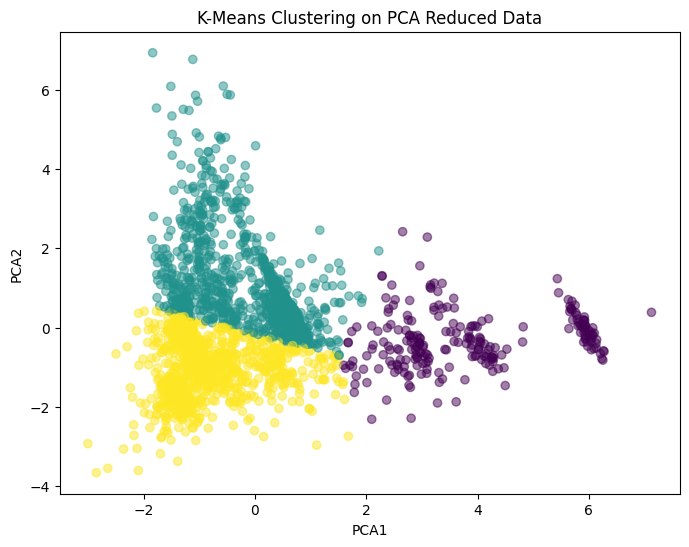

In [13]:
from sklearn.cluster import KMeans

# Применяем кластеризацию K-Means на 2 компонентах PCA
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PCA1', 'PCA2']])

# Визуализируем кластеры
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'],df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering on PCA Reduced Data')
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression

# Get PCA features from df_pca
X = df_pca[['PCA1', 'PCA2']]

# Get 'Price' from the original DataFrame (df_no_outliers)
y = df_no_outliers['Price']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Evaluate the model
score = model.score(X, y)
print(f'Model R^2 score: {score}')

#The R² score of 0.1247 means that only about 12.47% of the variance in Price can be explained by the two PCA components (PCA1 and PCA2).

Model R^2 score: 0.12475465475683467


Adding more original features (like Area, Rooms_count, etc.) directly to the model without PCA

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Select numeric features you want to include
features = ['Area', 'Rooms_count', 'Floor', 'Parking']  # You can add more numeric columns here
X = df_no_outliers[features]

# Target variable
y = df_no_outliers['Price']

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'Model R² score (original features): {score:.4f}')


Model R² score (original features): 0.0608


 include more numerical features before applying PCA, then use the PCA-transformed features to build a regression model

In [16]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

# Step 1: Select all numeric columns
numeric_data = df_no_outliers.select_dtypes(include='number')

# Optional: drop 'ID_numeric' if it's not useful
numeric_data = numeric_data.drop(columns=['ID_numeric'], errors='ignore')

# Step 2: Handle missing values (e.g., fill NaNs with column mean)
numeric_data = numeric_data.fillna(numeric_data.mean())

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

# Step 5: Target variable
y = df_no_outliers['Price']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Step 7: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'Model R² score (PCA on more features): {score:.4f}')



Model R² score (PCA on more features): 0.1213


Conclusion:

A simple linear model does a poor job of predicting prices.

PCA helps a little, but explains even more of the price spread of less than 13%.

The reason is uninformative or non-obvious dependencies that the linear model cannot capture.

## Correlation

In [27]:
# df_numeric = df_no_outliers.select_dtypes(include='number')
df_numeric = df.select_dtypes(include='number')



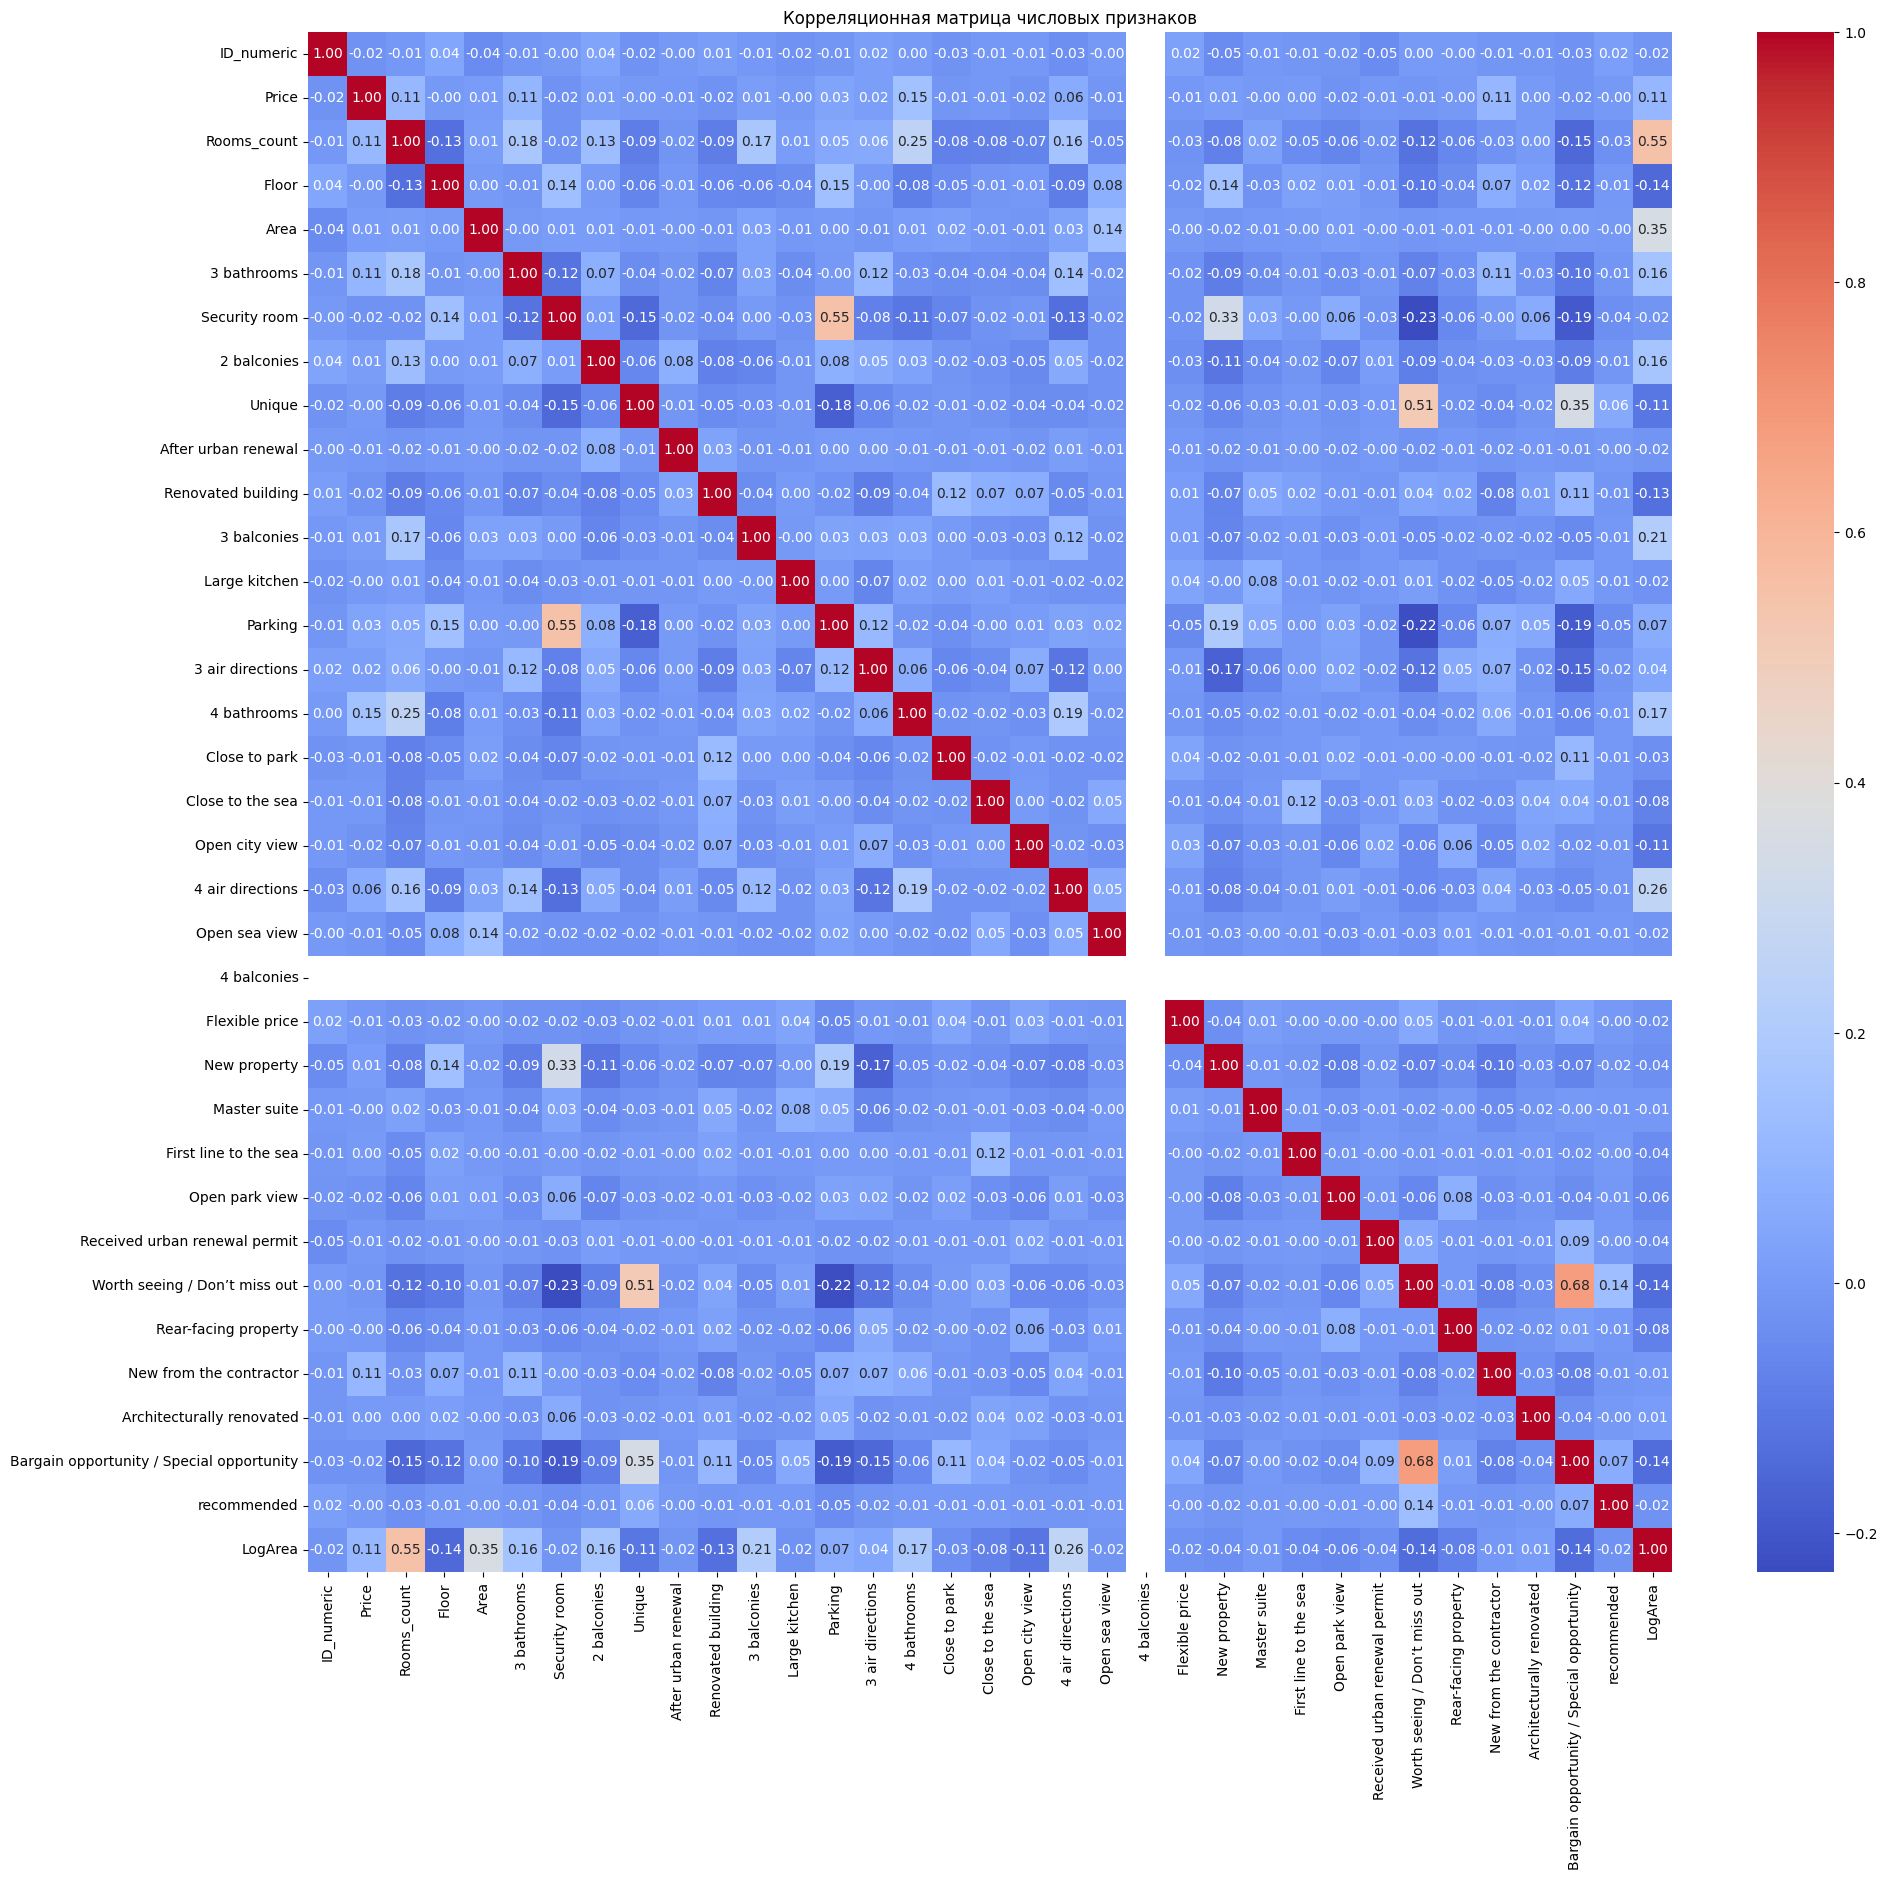

In [28]:
correlation_matrix = df_numeric.corr() # Calculate the correlation matrix

plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()


In [19]:
print(correlation_matrix['Price'].sort_values(ascending=False))




Price                                        1.000000
4 bathrooms                                  0.150737
Rooms_count                                  0.114605
New from the contractor                      0.109937
3 bathrooms                                  0.105635
4 air directions                             0.059421
Parking                                      0.034074
3 air directions                             0.015041
2 balconies                                  0.011743
3 balconies                                  0.010910
Area                                         0.008815
New property                                 0.006105
First line to the sea                        0.003661
Architecturally renovated                    0.001283
Rear-facing property                        -0.000298
Master suite                                -0.002727
recommended                                 -0.003366
Floor                                       -0.003453
Unique                      

Area = 0.0088 is suspiciously weak. Possibly:

Scaling issues (e.g. all values ​​are very small)

Outliers

Or Area is somehow incorrectly encoded

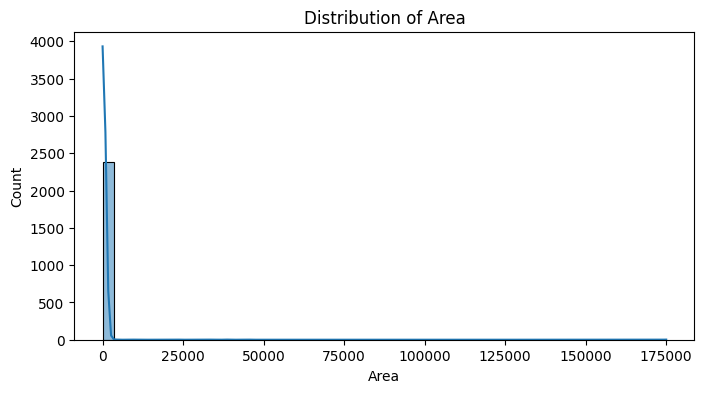

Min Area: 1
Max Area: 175000
Unique Area values (first 10): [345  50 270 124 114 200  88 440 135 207]

Descriptive stats for Area:
count      2393.000000
mean        316.202257
std        3870.939122
min           1.000000
25%          98.000000
50%         127.000000
75%         200.000000
max      175000.000000
Name: Area, dtype: float64


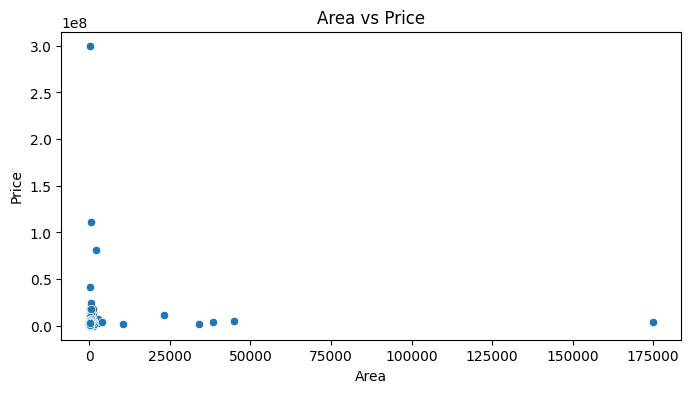

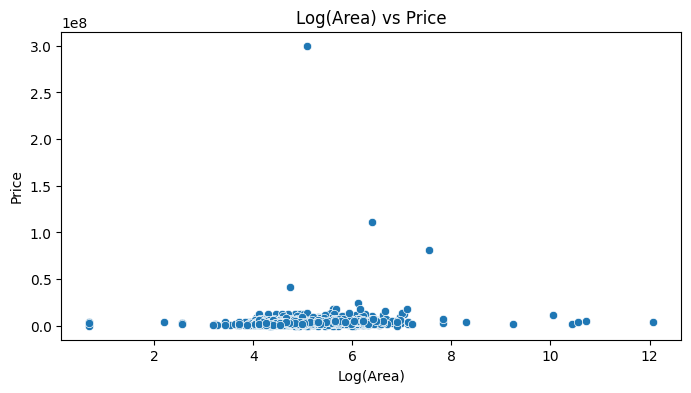


Correlation matrix:
             Area   LogArea     Price
Area     1.000000  0.352078  0.008815
LogArea  0.352078  1.000000  0.109922
Price    0.008815  0.109922  1.000000


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is called df

# 1. Check distribution of Area
plt.figure(figsize=(8, 4))
sns.histplot(df['Area'], bins=50, kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

# 2. Basic statistics of Area
print("Min Area:", df['Area'].min())
print("Max Area:", df['Area'].max())
print("Unique Area values (first 10):", df['Area'].unique()[:10])
print("\nDescriptive stats for Area:")
print(df['Area'].describe())

# 3. Scatter plot Area vs Price
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# 4. Log-transform Area to reduce skewness
df['LogArea'] = np.log1p(df['Area'])  # log(Area + 1)

# 5. Scatter plot Log(Area) vs Price
plt.figure(figsize=(8, 4))
sns.scatterplot(x='LogArea', y='Price', data=df)
plt.title('Log(Area) vs Price')
plt.xlabel('Log(Area)')
plt.ylabel('Price')
plt.show()

# 6. Correlation check
corr_matrix = df[['Area', 'LogArea', 'Price']].corr()
print("\nCorrelation matrix:")
print(corr_matrix)


Major Issues:

    Max = 175,000 m²  — likely a data entry error (e.g., land plot or incorrect unit).

    Median = 127, mean = 316, but std = 3870 — this indicates extreme right-skew (i.e., huge outliers).

    Even 75% of listings are ≤ 200 m², so anything > 500 m² is suspicious.

Visualize the distribution (check outliers)

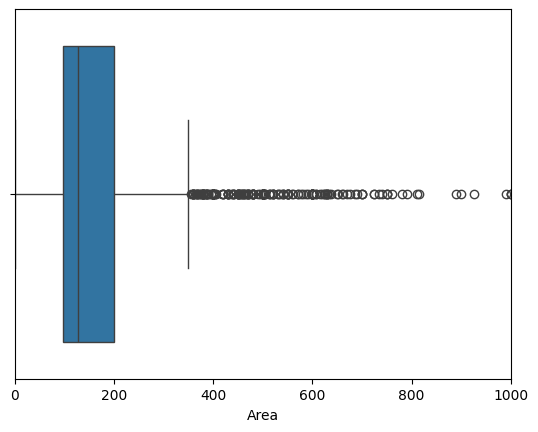

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Area'])
plt.xlim(0, 1000)  # zoom in to ignore extreme outliers
plt.show()


In [22]:
df_clean = df[df['Area'] < 1000].copy()


In [23]:
print("Original correlation:", df['Area'].corr(df['Price']))
print("Cleaned correlation:", df_clean['Area'].corr(df_clean['Price']))


Original correlation: 0.008814775620406504
Cleaned correlation: 0.09166962597793112


0.0088 → basically no relationship due to outliers distorting the result.
0.0917 → still weak, but much more reasonable.

In [24]:
#log(Area)
df_clean['LogArea'] = np.log1p(df_clean['Area'])
print(df_clean[['LogArea', 'Price']].corr())


          LogArea     Price
LogArea  1.000000  0.097193
Price    0.097193  1.000000


It suggests that a log transformation helps to linearize the relationship between area and price.

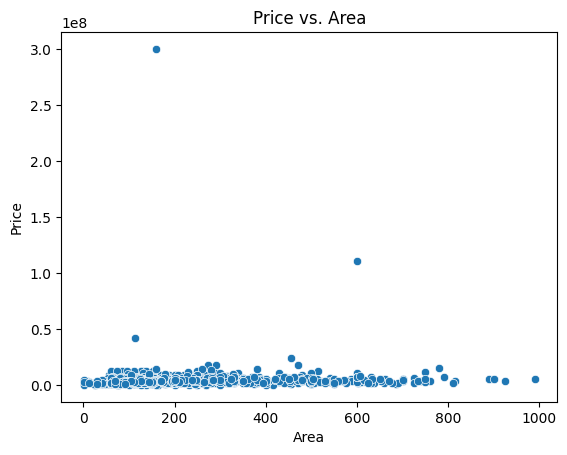

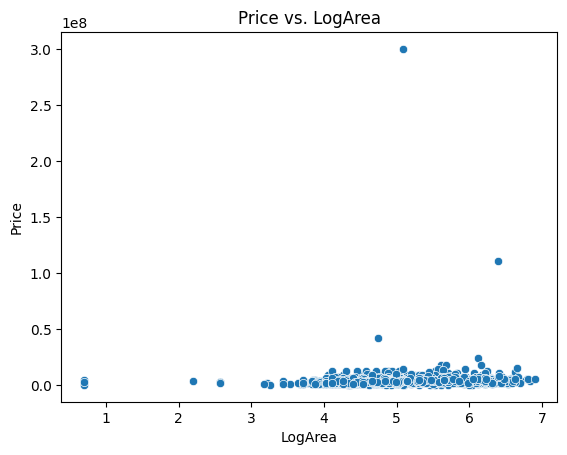

In [25]:
sns.scatterplot(data=df_clean, x='Area', y='Price')
plt.title('Price vs. Area')
plt.show()

sns.scatterplot(data=df_clean, x='LogArea', y='Price')
plt.title('Price vs. LogArea')
plt.show()


# Machine Learning

## LinearRegression

In [73]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# Step 1: Select all numeric columns
numeric_data = df_no_outliers.select_dtypes(include='number')

# Optional: drop 'ID_numeric' if it's not useful
numeric_data = numeric_data.drop(columns=['ID_numeric'], errors='ignore')

# Step 2: Handle missing values (e.g., fill NaNs with column mean)
numeric_data = numeric_data.fillna(numeric_data.mean())

# Step 3: Add LogArea feature to the data
numeric_data['LogArea'] = np.log1p(numeric_data['Area'])  # Adding the LogArea feature

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 5: Apply PCA (consider more components if necessary)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

# Step 6: Target variable
y = df_no_outliers['Price']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Step 8: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Evaluate
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'Model R² score (PCA on more features + LogArea): {score:.4f}')


Model R² score (PCA on more features + LogArea): 0.0447


In [29]:
# Step 1: Select only the relevant features based on the correlation with Price
selected_features = [
    '4 bathrooms', 'Rooms_count', 'New from the contractor', 
    '3 bathrooms', '4 air directions', 'Parking', 
    '3 air directions', '2 balconies', '3 balconies', 
    'Area', 'New property'
]

# Step 2: Create a new DataFrame with the selected features and the target variable
X_selected = df_no_outliers[selected_features]
y_selected = df_no_outliers['Price']

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Step 4: Standardize the data (optional but recommended for Linear Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Evaluate the model
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_scaled)
score = r2_score(y_test, y_pred)

# Print R² score
print(f'Model R² score (using selected features): {score:.4f}')


Model R² score (using selected features): 0.0919


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

# Step 1: Select all numeric columns
numeric_data = df_no_outliers.select_dtypes(include='number')

# Optional: drop 'ID_numeric' if it's not useful
numeric_data = numeric_data.drop(columns=['ID_numeric'], errors='ignore')

# Step 2: Handle missing values (e.g., fill NaNs with column mean)
numeric_data = numeric_data.fillna(numeric_data.mean())

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA (optional, based on previous steps)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

# Step 5: Target variable
y = df_no_outliers['Price']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Step 7: Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'Random Forest R² score: {score:.4f}')


Random Forest R² score: 0.1835


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Assuming you have selected the relevant features as mentioned above
selected_features = ['4 bathrooms', 'Rooms_count', 'New from the contractor', '3 bathrooms', '4 air directions', 'Parking', '3 air directions', '2 balconies', '3 balconies', 'Area', 'New property']

# Create X_train_selected with only the selected features
X_train_selected = X_train[selected_features]

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train and evaluate using cross-validation
rf_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5, scoring='r2')

# Output the results
print(f"Random Forest Cross-validation R² scores: {rf_scores}")
print(f"Mean R² score: {rf_scores.mean():.4f}")
print(f"Standard deviation of R² scores: {rf_scores.std():.4f}")



Random Forest Cross-validation R² scores: [-0.07982702 -0.15757462 -0.19718759 -0.08430726 -0.12430253]
Mean R² score: -0.1286
Standard deviation of R² scores: 0.0445


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X_train_selected, y_train)

# Best hyperparameters and model evaluation
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best R² score: {grid_search.best_score_:.4f}")


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R² score: 0.0865


## GradientBoostingRegressor

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

# Step 1: Select all numeric columns
numeric_data = df_no_outliers.select_dtypes(include='number')

# Optional: drop 'ID_numeric' if it's not useful
numeric_data = numeric_data.drop(columns=['ID_numeric'], errors='ignore')

# Step 2: Handle missing values (e.g., fill NaNs with column mean)
numeric_data = numeric_data.fillna(numeric_data.mean())

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA (optional, based on previous steps)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

# Step 5: Target variable
y = df_no_outliers['Price']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Step 7: Initialize and train the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = gb_model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'Gradient Boosting R² score: {score:.4f}')


Gradient Boosting R² score: 0.2474


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train and evaluate using cross-validation
gb_scores = cross_val_score(gb_model, X_train_selected, y_train, cv=5, scoring='r2')

# Output the results
print(f"Gradient Boosting Cross-validation R² scores: {gb_scores}")
print(f"Mean R² score: {gb_scores.mean():.4f}")
print(f"Standard deviation of R² scores: {gb_scores.std():.4f}")


NameError: name 'X_train_selected' is not defined